In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
percorso_file_csv = "C:\\Users\\matti\\Downloads\\heart_disease_uci.csv"
df = pd.read_csv(percorso_file_csv)
print(df.head())
df.shape

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


(920, 16)

In [11]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


### GRAFICO MALATI IN RELAZIONE CON ETA'

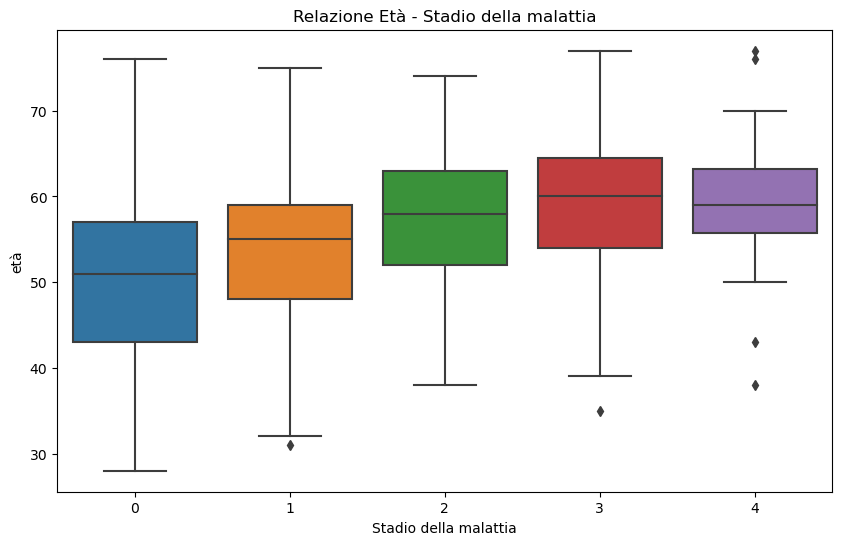

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['num'], y=df['age'])
plt.title('Relazione Età - Stadio della malattia')
plt.xlabel('Stadio della malattia')
plt.ylabel('età')
plt.show()


### ANALISI:
#### Da questo grafico possiamo dedurre che più si avanza con l'età più si possono riscontrare problemi al cuore.
#### Ci sono da considerare molti outlier in questa lista poichè non si poù sapere con che rapidità una malattia agisce e interferisce con il soggetto

## Grafico differenza maschio femmina

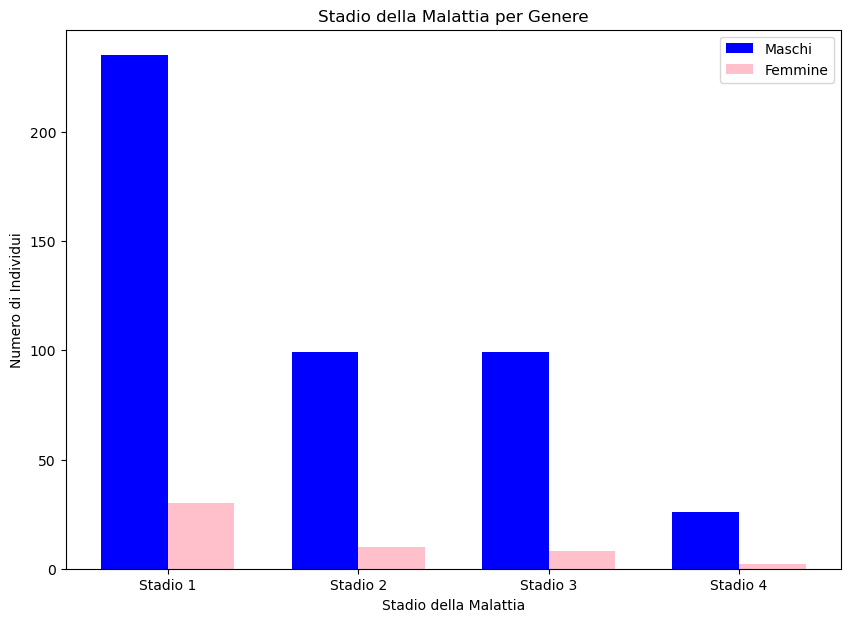

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati
df = pd.read_csv('C:\\Users\\matti\\Downloads\\heart_disease_uci.csv')

# Filtra per sesso
male_data = df[df['sex'] == 'Male']
female_data = df[df['sex'] == 'Female']

# Calcola il numero di individui per stadio della malattia per ciascun sesso
male_counts = male_data['num'].value_counts().sort_index()
female_counts = female_data['num'].value_counts().sort_index()

# Definisci i valori per l'asse x e y
stages = ['Stadio 1', 'Stadio 2', 'Stadio 3', 'Stadio 4']
male_values = [male_counts.get(stage, 0) for stage in range(1, 5)]
female_values = [female_counts.get(stage, 0) for stage in range(1, 5)]

# Crea il grafico a barre
plt.figure(figsize=(10, 7))
bar_width = 0.35
index = range(1, 5)

plt.bar(index, male_values, bar_width, label='Maschi', color='blue')
plt.bar([i + bar_width for i in index], female_values, bar_width, label='Femmine', color='pink')

plt.title('Stadio della Malattia per Genere')
plt.xlabel('Stadio della Malattia')
plt.ylabel('Numero di Individui')
plt.xticks([i + bar_width / 2 for i in index], stages)
plt.legend()
plt.show()

### In questo grafico capiamo che i maschi sono più colpiti da malattie al cuore

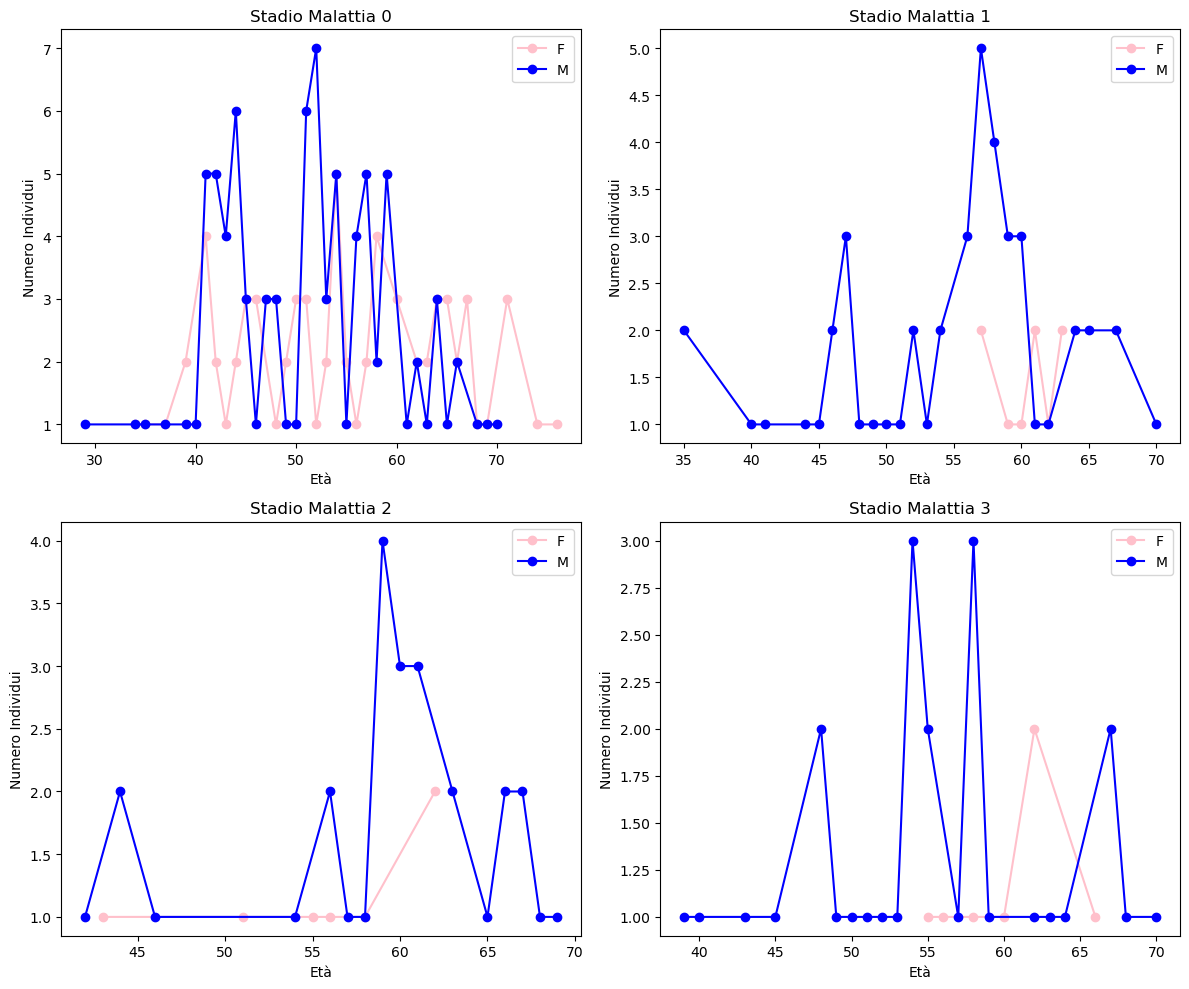

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati
df = pd.read_csv('C:\\Users\\matti\\Downloads\\heart_disease_uci.csv')

# Filtra i dati rimuovendo le righe con valori mancanti
df.dropna(inplace=True)

# Filtra per sesso e stadio della malattia
male_data = df[df['sex'] == 'Male']
female_data = df[df['sex'] == 'Female']

# Calcola il conteggio degli individui per ogni combinazione di età, sesso e stadio della malattia
male_counts = male_data.groupby(['age', 'num']).size().reset_index(name='count')
female_counts = female_data.groupby(['age', 'num']).size().reset_index(name='count')

# Unisci i due DataFrame
combined_counts = pd.concat([male_counts, female_counts])

# Aggiungi una colonna per distinguere tra maschi e femmine
combined_counts['sex'] = ['M'] * len(male_counts) + ['F'] * len(female_counts)

# Visualizza il grafico 2D
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for (num, group), ax in zip(combined_counts.groupby('num'), axes.flatten()):
    for sex, data in group.groupby('sex'):
        color = 'blue' if sex == 'M' else 'pink'
        ax.plot(data['age'], data['count'], marker='o', linestyle='-', label=sex, color=color)
    ax.set_title(f'Stadio Malattia {num}')
    ax.set_xlabel('Età')
    ax.set_ylabel('Numero Individui')
    ax.legend()
plt.tight_layout()
plt.show()




### Qua invece vediamo che la malattia si presenta più facilmente in maschi di età avanzata

## Ora creiamo dei traningset per riconoscere i malati dai sani

### Ora possiamo fare una Traning set che capisce se qualcuno è malato o sano (Tenendo gli outlier)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carica i dati
df = pd.read_csv('C:\\Users\\matti\\Downloads\\heart_disease_uci.csv')

# Rimuovi le righe con valori mancanti
df.dropna(inplace=True)

# Modifica il target y in 0 (sano) e 1 (malato)
df['num'] = df['num'].apply(lambda x: 1 if x != 0 else 0)

# Dividi il dataset in variabili indipendenti (X) e dipendenti (y)
X = df[['chol', 'age', 'trestbps']]
y = df['num']

# Dividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modello di classificazione
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestra il modello
model.fit(X_train, y_train)

# Effettua delle predizioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualizza il report di classificazione
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.6333333333333333
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        35
           1       0.55      0.64      0.59        25

    accuracy                           0.63        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.64      0.63      0.64        60



### Con i dati reperiti possimo creare un traning set che capisce se una persona è malata o sana, e se malata capisce lo stadio della malattia.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carica i dati
df = pd.read_csv('C:\\Users\\matti\\Downloads\\heart_disease_uci.csv')

# Rimuovi le righe con valori mancanti
df.dropna(inplace=True)

# Dividi il dataset in variabili indipendenti (X) e dipendenti (y)
X = df[['chol', 'age', 'trestbps']]
y = df['num']

# Dividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modello di classificazione
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestra il modello
model.fit(X_train, y_train)

# Effettua delle predizioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualizza il report di classificazione
print(classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.5166666666666667
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        35
           1       0.33      0.15      0.21        13
           2       0.17      0.20      0.18         5
           3       0.00      0.00      1.00         4
           4       1.00      0.00      0.00         3

    accuracy                           0.52        60
   macro avg       0.43      0.23      0.42        60
weighted avg       0.52      0.52      0.55        60



### In questi Traning set abbiamo una percentuale di accuratezza molto basso poichè ogni persona reagisce in modi diversi alle malattie